In [260]:
# Imoorting packages

import pandas as pd
import numpy as np

## First look at the data


In [261]:
# First look at the data

df = pd.read_csv('churn_data_before_processing.csv', index_col= 0)
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
5,6,15574012,Chu,645.0,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822.0,France,Male,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376.0,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
9,10,15592389,NaN,684.0,France,Male,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0


In [262]:
df.shape

(10150, 14)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10150 entries, 0 to 8
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10150 non-null  int64  
 1   CustomerId       10150 non-null  int64  
 2   Surname          10056 non-null  object 
 3   CreditScore      10132 non-null  float64
 4   Geography        9954 non-null   object 
 5   Gender           9867 non-null   object 
 6   Age              9879 non-null   float64
 7   Tenure           10070 non-null  float64
 8   Balance          9994 non-null   float64
 9   NumOfProducts    9862 non-null   float64
 10  HasCrCard        10067 non-null  float64
 11  IsActiveMember   10063 non-null  float64
 12  EstimatedSalary  10106 non-null  float64
 13  Exited           10150 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.2+ MB


Missing values in every columns except CustomerID and Exited

In [264]:
# Changing column names

df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [265]:
# Droping useless Column

df.drop('rownumber', axis = 1)

,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3612,15792151,Hamilton,635.0,Spain,Female,37.0,3.0,0.00,2.0,1.0,0.0,91086.73,0
4437,15779522,Efimov,736.0,France,Female,24.0,0.0,0.00,2.0,1.0,0.0,109355.73,1
6549,15792029,Lee,620.0,France,Male,32.0,6.0,0.00,2.0,1.0,0.0,56139.09,0
4590,15680167,Thomson,635.0,France,Female,78.0,6.0,47536.40,1.0,NaN,1.0,119400.08,0


In [266]:
#pd.set_option('display.max_rows', None)

In [267]:
#pd.reset_option("display.max_rows")

## Eliminating duplicates

In [268]:
df.duplicated().sum()


104

In [269]:
df.drop_duplicates(subset= ["customerid"], inplace=True)

In [270]:
df.customerid.duplicated().any()

False

In [271]:
df.shape

(10000, 14)

## CUSTOMER ID COLUMN

In [272]:
# checking for type and missing values

print(type(df.customerid[0]))
df.customerid.isna().any()

<class 'numpy.int64'>


False

## SURNAME COLUMN

In [273]:
# Cheking for type and missing values

print(type(df.surname[0]))
print(df.surname.isna().any())
print(df.surname.isna().sum())

<class 'str'>
True
92


In [274]:
# Creating a new category for missing values

df.surname.fillna('No information avilable', inplace= True)
print(df.surname.isna().any())

False


In [275]:
#checking for other types of Na's

df[df.surname.isin(["Null", "null", "nan"])]["surname"]

Series([], Name: surname, dtype: object)

In [276]:
# Frequency Table

df.surname.value_counts()

No information avilable    92
Smith                      32
Martin                     29
Scott                      29
Walker                     28
                           ..
Clancy                      1
Swayne                      1
Le Grand                    1
Miranda                     1
Palmerston                  1
Name: surname, Length: 2926, dtype: int64

<AxesSubplot:>

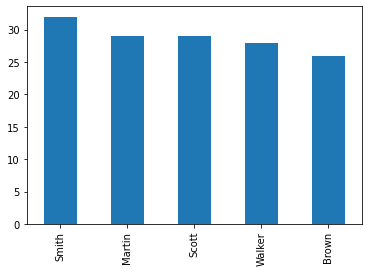

In [277]:
# Plotting the 5 most frequent names

most_freq_names = ['Smith', 'Martin', 'Scott', 'Walker', 'Brown']

df.loc[df.surname.isin(most_freq_names), 'surname'].value_counts().plot(kind= 'bar')

## CREDIT SCORE

In [278]:
# Checking for Type and Missing values

print(type(df.creditscore[0])) 
print(df.creditscore.isna().any())
print(df.creditscore.isna().sum())

<class 'numpy.float64'>
True
18


In [279]:
# Column description

print(df.creditscore.describe())
CS_median = df.creditscore.median()
print("median = %s" % CS_median)

count    9982.000000
mean      650.902076
std       100.409554
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max      2924.008649
Name: creditscore, dtype: float64
median = 652.0


<AxesSubplot:>

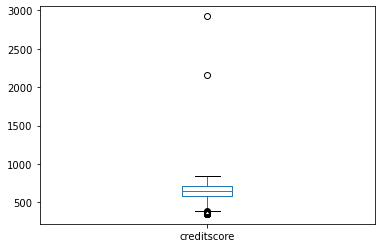

In [280]:
#identifiying the outliers

df.creditscore.plot( kind = 'box')

<AxesSubplot:ylabel='Frequency'>

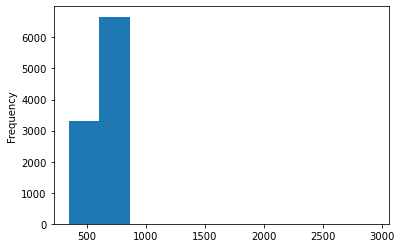

In [281]:
df.creditscore.plot( kind = 'hist')

In [282]:
# values bigger than 850 are outliers
# saving a version of the Column without the outliers

CS_cleaned = df[df.creditscore < 850]["creditscore"].copy()
CS_cleaned.describe()

count    9749.000000
mean      645.796697
std        92.706084
min       350.000000
25%       582.000000
50%       649.000000
75%       712.000000
max       849.000000
Name: creditscore, dtype: float64

<AxesSubplot:>

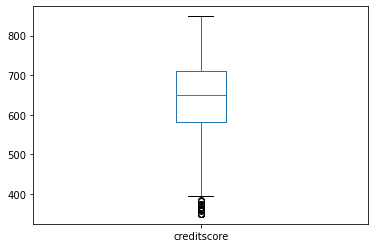

In [283]:
# Box plot without the outliers

CS_cleaned.plot(kind = 'box')

I looked it up and (based on the FICO ranking system) The maximum credit score is 850 which makes sense because without the two potential outliers the max credit score in our sample is 850 as well. Thus the two scores above 850 are definitevely outliers

In [284]:
# Relacing missing values and outliers with Median
# calculating median without outliers

CS_median = CS_cleaned.median()
CS_median

649.0

In [285]:
df.creditscore.fillna(CS_median, inplace= True)
df.loc[df.creditscore > 850, "creditscore"] = CS_median

In [286]:
df.creditscore.isna().any()

False

In [287]:
assert max(df.creditscore) == 850

## Geography Column

In [288]:
# Checking for Type and missing values
type(df.geography[0]),  df.geography.isna().sum(), df.geography.isna().mean()

(str, 195, 0.0195)

In [289]:
# Frequency Table

df.geography.value_counts(dropna =False), df.geography.value_counts(normalize = True, dropna = False)

(France     4923
 Germany    2451
 Spain      2431
 NaN         195
 Name: geography, dtype: int64,
 France     0.4923
 Germany    0.2451
 Spain      0.2431
 NaN        0.0195
 Name: geography, dtype: float64)

In [290]:
# Using the mode to fill NA

df.geography.fillna('France', inplace= True)

In [291]:
df.geography.value_counts(dropna =False)

France     5118
Germany    2451
Spain      2431
Name: geography, dtype: int64

<AxesSubplot:>

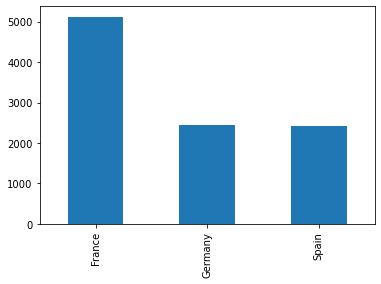

In [292]:
df.geography.value_counts().plot(kind= 'bar')

## Gender Column

In [293]:
# Checking for type and missing values

type(df.gender[0]), df.gender.isna().sum(), df.gender.isna().mean()

(str, 278, 0.0278)

In [294]:
# Frequnecy Table 

df.gender.value_counts(dropna = False), 

(Male      5304
 Female    4418
 NaN        278
 Name: gender, dtype: int64,)

In [295]:
# As the differnce in proportion bewtween male and female is not big we can use the mode to replace the missing values

df.gender.fillna("Male", inplace=True)

In [296]:
df.gender.value_counts(dropna = False), 

(Male      5582
 Female    4418
 Name: gender, dtype: int64,)

<AxesSubplot:>

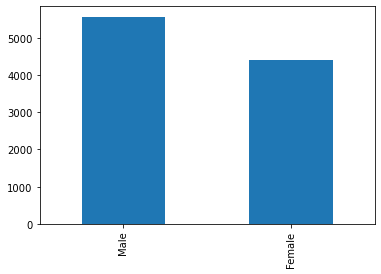

In [297]:
df.gender.value_counts().plot(kind= 'bar')

## Age Column

In [298]:
# Checking for Type and missing values

type(df.age[0]) , df.age.isna().sum(),  df.age.isna().mean()

(numpy.float64, 261, 0.0261)

In [299]:
# Column Description

print(df.Age.describe())
median_Age = df.Age.median()
print("Median = %s" % median_Age)

AttributeError: 'DataFrame' object has no attribute 'Age'

In [ ]:
# categorical or continous? polly response = discrete numerical

In [ ]:
# Finding outliers

<AxesSubplot:>

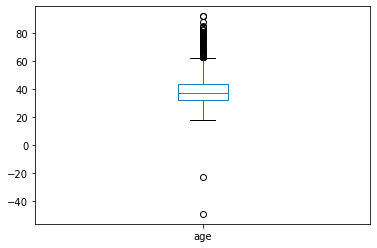

In [ ]:
df.age.plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

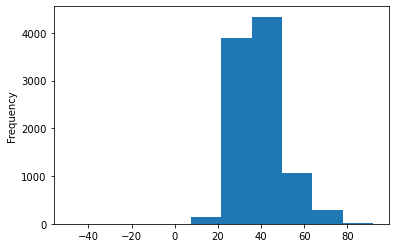

In [ ]:
df.age.plot(kind= 'hist')

In [ ]:
# Negative values are ouliers
# Calculating median without the outliers

median_age = df[df.age > 0]["age"].median()

In [ ]:
# Replacing outliers and missing values with median age

df.age.fillna(median_age, inplace= True)
df.loc[df.age < 0, 'age'] = median_age

In [ ]:
# Asserting that the minimum age is 18 years

assert df.age.min() >= 18

In [ ]:
df.age.describe()

count    10000.00000
mean        38.91450
std         10.37114
min         18.00000
25%         32.00000
50%         37.00000
75%         44.00000
max         92.00000
Name: age, dtype: float64

In [ ]:
# Changing the type from float to integer

df['age']  = df.age.astype('int')
type(df.age[0])

numpy.int32

## Tenure Column

Tenure is actually the lenght of the loan

In [ ]:
# Checking for type and missing values

print(type(df.tenure[0]))
df.tenure.isna().sum()

<class 'numpy.float64'>


78

In [ ]:
# Column description

print(df.tenure.describe())
median_tenure = df.tenure.median()
print( 'median = %s' %median_tenure)


count    9922.000000
mean        5.014316
std         2.905638
min        -5.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        32.044103
Name: tenure, dtype: float64
median = 5.0


<AxesSubplot:>

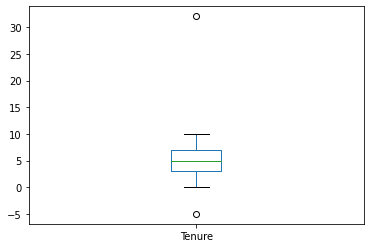

In [ ]:
# Finding outliers 

df.Tenure.plot(kind = 'box')

In [ ]:
df.loc[df.tenure > 30, 'age']

5204    33
Name: age, dtype: int32

In [ ]:
# outliers are negatives values. The two values bigger than 30 as outliers as well because these two persons are only in their 30's.
# Calculating median without outliers, step 1: clean the tenure column and save it as a new df

df_tenure_cleaned = df[df.tenure < 30]["tenure"].copy()
df_tenure_cleaned = df_tenure_cleaned[df_tenure_cleaned > 0] 

In [ ]:
# step 2: calculate the median of the cleaned column

median_tenure = df_tenure_cleaned.median()

In [ ]:
# outliers are negatives values. The two values bigger than 30 as outliers as well because these two persons are only in their 30's.
# Replacing NA's and outliers with median

df[df.tenure > 30] = median_tenure
df[df.tenure < 0] = median_tenure


In [ ]:
assert min(df.tenure) == 0 
assert max(df.tenure) > 0 

<AxesSubplot:>

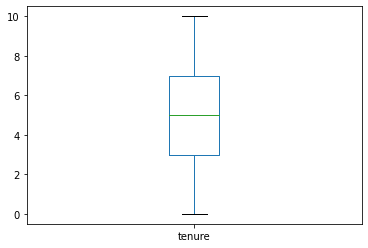

In [ ]:
df.tenure.plot( kind = "box")

## Balance Column

In [ ]:
# Cheking for type and missing values 

type(df.balance[0]), df.balance.isna().sum(), df.balance.isna().mean()

(numpy.float64, 150, 0.015)

In [ ]:
# Describe the column

print(df.balance.describe())
median_balance = df.balance.median()
print('Median = %s' %df.balance.median())

count    9.850000e+03
mean     7.670732e+04
std      6.372795e+04
min      0.000000e+00
25%      0.000000e+00
50%      9.722152e+04
75%      1.276382e+05
max      1.036826e+06
Name: balance, dtype: float64
Median = 97221.52


<AxesSubplot:>

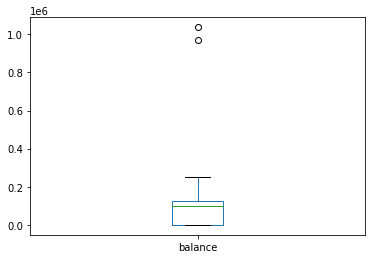

In [ ]:
# Finding Outliers 

df.balance.plot(kind = 'box')

Values bigger than 800 000 are potential ouliers

In [ ]:
# Look up the other variables of the potential outliers

df[df.balance > 0.8e6]

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
2135,2136,15704284,Ekechukwu,736.0,Germany,Male,57,9.0,9.697802e+05,1.0,1.0,0.0,28434.44,1
5464,5465,15795540,Reye,556.0,France,Female,36,2.0,1.036826e+06,1.0,0.0,1.0,177670.57,0


Seems to have a low salary for such a huge balance

## Number of products Column


In [ ]:
# Cheking for type and outliers

type(df.numofproducts[0]), df.numofproducts.isna().sum()

(numpy.float64, 286)

In [ ]:
# Description

df.numofproducts.value_counts(dropna =False)

 1.00000     4944
 2.00000     4449
 NaN          286
 3.00000      255
 4.00000       58
-2.00000        3
 5.00000        2
-1.00000        2
 11.17746       1
Name: numofproducts, dtype: int64

<AxesSubplot:>

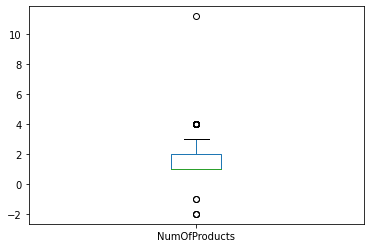

In [ ]:
# Finding outliers

df.NumOfProducts.plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

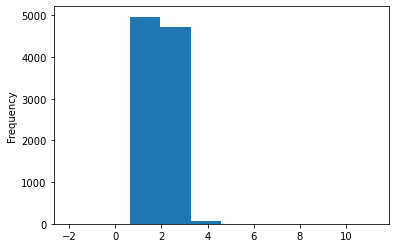

In [ ]:
df.NumOfProducts.plot(kind = 'hist')

Negative value are ouliers and 11.1176 is an oulier, 11,17 is most certainly an outlier because the number is much becaure than any other point and it's a fractional number


In [ ]:
# Looking at the ratios for each categories

df.numofproducts.value_counts(dropna =False, normalize= True)

 1.00000     0.4944
 2.00000     0.4449
 NaN         0.0286
 3.00000     0.0255
 4.00000     0.0058
-2.00000     0.0003
 5.00000     0.0002
-1.00000     0.0002
 11.17746    0.0001
Name: numofproducts, dtype: float64

Only +- 3% of the values are wrong so will not affect the distribution to use mode to replace these values

In [ ]:
df.numofproducts.fillna(1, inplace=True)

df.loc[((df.numofproducts <0) | (df.numofproducts >10)), "numofproducts"] =  1

In [ ]:
df.numofproducts.value_counts(dropna= False)

1.0    5236
2.0    4449
3.0     255
4.0      58
5.0       2
Name: numofproducts, dtype: int64

## Has Credit Card Column

In [ ]:
# Checking for type and missing values

type(df.hascrcard[0]), df.hascrcard.isna().sum(), df.hascrcard.isna().mean()

(numpy.float64, 80, 0.008)

In [ ]:
# Frequency table

df.hascrcard.value_counts(dropna = False), df.hascrcard.value_counts(dropna = False, normalize= True)

(1.0    6994
 0.0    2924
 NaN      80
 5.0       2
 Name: hascrcard, dtype: int64,
 1.0    0.6994
 0.0    0.2924
 NaN    0.0080
 5.0    0.0002
 Name: hascrcard, dtype: float64)

Only 0.8 % of missing value, we can drop then without affecting the the dataset

In [301]:
df.dropna(subset= ["hascrcard"], how ="any", inplace =True)

In [303]:
assert df.hascrcard.isna().any() == False

<AxesSubplot:>

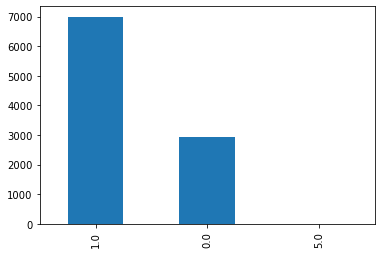

In [ ]:
# Plotting frequencies

df.hascrcard.value_counts().plot(kind = 'bar')

the value 5 makes no sense as the variable is binary so will remplace them with the mode (1)

In [304]:
df.loc[df.hascrcard==5, "hascard"] = 1

In [305]:
df.hascrcard.value_counts(dropna =False)

1.0    6996
0.0    2924
Name: hascrcard, dtype: int64

## IS Active Member Column

In [308]:
# Checking for type and missing values

type(df.isactivemember[0]), df.isactivemember.isna().sum(), df.isactivemember.isna().mean()

(numpy.float64, 87, 0.00877016129032258)

In [309]:
# Frequency table

df.isactivemember.value_counts(dropna = False)

1.0    5068
0.0    4765
NaN      87
Name: isactivemember, dtype: int64

Same as last column, Only 0.8 % of missing value, we can drop then without affecting the the dataset

In [311]:
df.dropna(subset= ["isactivemember"], how ="any", inplace =True)

In [312]:
assert df.isactivemember.isna().any() == False

<AxesSubplot:>

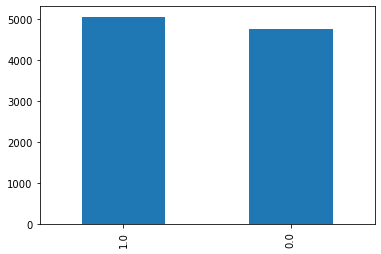

In [313]:
# Plotting frequencies

df.isactivemember.value_counts().plot(kind = 'bar')

No outliers

## Estimated Salary 

In [315]:
# Checking for type and missing values
type(df.estimatedsalary[0]), df.estimatedsalary.isna().sum(), df.estimatedsalary.isna().mean()

(numpy.float64, 43, 0.004373029594223533)

In [318]:
# Description

print(df.estimatedsalary.describe())
median_salary = df.estimatedsalary.median()
print('Median: %s'%median_salary)

count      9790.000000
mean     100188.120488
std       57555.997241
min          11.580000
25%       51102.870000
50%      100272.165000
75%      149547.250000
max      199992.480000
Name: estimatedsalary, dtype: float64
Median: 100272.16500000001


<AxesSubplot:>

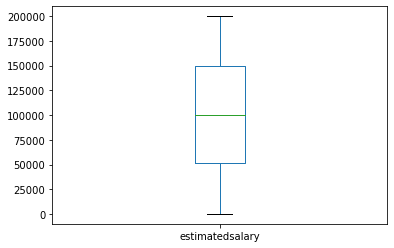

In [319]:
# Finding Outliers

df.estimatedsalary.plot(kind ='box')


<AxesSubplot:ylabel='Frequency'>

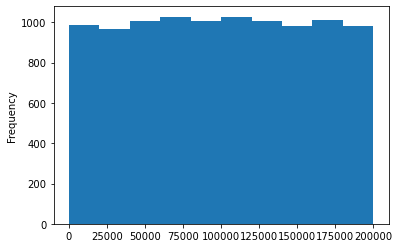

In [ ]:
df.EstimatedSalary.plot(kind ='hist')

Is is it annual ?? Some values seem to be very small

## Exited Column


In [321]:
# Cheking for type and missing values

type(df.exited), df.exited.isna().any()

(pandas.core.series.Series, False)

No missing values

0    7827
1    2006
Name: exited, dtype: int64


<AxesSubplot:>

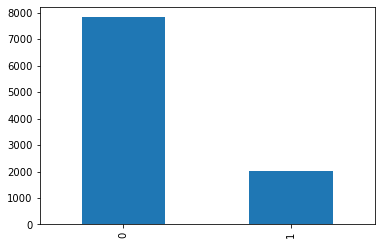

In [323]:
# Cheking for weird values

print(df.exited.value_counts())
df.exited.value_counts().plot(kind = 'bar')

No weird values
